<a href="https://colab.research.google.com/github/INDAHYANTIDJURAID/202255202009-Indah/blob/main/Selamat_Datang_di_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Selamat Datang di Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Baru&#41; Coba Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the Excel file from Google Drive (update with your file path)
file_path = '/content/drive/MyDrive/Input_JST.xlsx'
df = pd.read_excel(file_path)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Prepare the dataset
X = df[['Jumlah Unit Terjual', 'Harga', 'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)', 'Penilaian Pelanggan']]
y = df['Terjual Cepat (1 = Terjual Cepat, 0 = Tidak Terjual Cepat)']

In [8]:
# Convert 'y' to categorical data for multi-class classification
y_categorical = tf.keras.utils.to_categorical(y, num_classes=2) # 2 classes: Terjual Cepat (1) dan Tidak Terjual Cepat (0)


In [9]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Define the neural network model with the specified architecture
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(4,)), # Input layer with 4 neurons
tf.keras.layers.Dense(5, activation='relu'), # Hidden Layer 1 with 5 neurons
tf.keras.layers.Dense(3, activation='relu'), # Hidden Layer 2 with 3 neurons
tf.keras.layers.Dense(2, activation='softmax') # Output Layer with 2 neurons (softmax for multi-class classification)
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1831 - loss: 0.9736 - val_accuracy: 0.1667 - val_loss: 1.0458
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2000 - loss: 0.9862 - val_accuracy: 0.2083 - val_loss: 0.9918
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2637 - loss: 0.9205 - val_accuracy: 0.2292 - val_loss: 0.9459
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2604 - loss: 0.8668 - val_accuracy: 0.2917 - val_loss: 0.9054
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2843 - loss: 0.8514 - val_accuracy: 0.2917 - val_loss: 0.8715
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3644 - loss: 0.7994 - val_accuracy: 0.3125 - val_loss: 0.8409
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3488 - loss: 0.8140 - val_accuracy: 0.3542 - val_loss: 0.8131
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3866 - loss: 0.7777 - val_accuracy: 0.3750 - val_loss

In [14]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7076 - loss: 0.5164  
Test Accuracy: 0.7333
Test Loss: 0.4925


In [15]:
# Plotting the training and validation loss and accuracy
plt.figure(figsize=(14, 5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

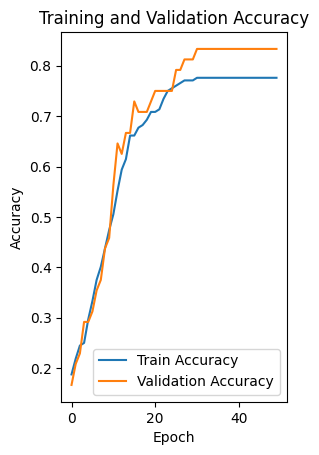

In [16]:
#Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


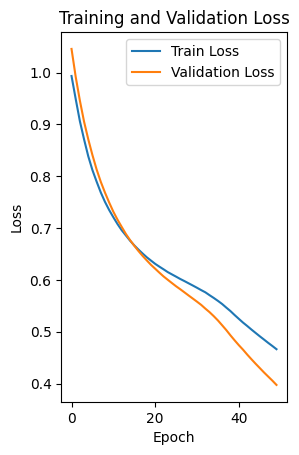

In [17]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [18]:
# Show the plots
plt.show()


In [19]:
# ----- Predict on new data -----
# Example: Data baru yang ingin diujicobakan
new_data = pd.DataFrame({
'Jumlah Unit Terjual': [200, 50, 400], # Jumlah unit terjual
'Harga': [2500, 1500, 3500], # Harga yang sudah disesuaikan dengan kategori
'Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)': [0, 1, 2], # Kategori produk
'Penilaian Pelanggan': [4.5, 3.0, 5.0] # Penilaian Pelanggan
})

In [20]:
# Standardize the new data
new_data_scaled = scaler.transform(new_data)


In [21]:
# Predict using the trained model
predictions = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [22]:
# Get class labels for each prediction
predicted_classes = np.argmax(predictions, axis=1) # Convert from one-hot encoded to class labels (0 or 1)

In [23]:
# Map class labels to 'Terjual Cepat' or 'Tidak Terjual Cepat'
class_labels = ['Tidak Terjual Cepat', 'Terjual Cepat']
predicted_labels = [class_labels[cls] for cls in predicted_classes]
new_data['Prediksi'] = predicted_labels
print("\nPrediksi untuk data baru:")
print(new_data)


Prediksi untuk data baru:
   Jumlah Unit Terjual  Harga  \
0                  200   2500   
1                   50   1500   
2                  400   3500   

   Kategori Produk (0 = Laptop, 1 = Smartphone, 2 = Televisi)  \
0                                                  0            
1                                                  1            
2                                                  2            

   Penilaian Pelanggan             Prediksi  
0                  4.5  Tidak Terjual Cepat  
1                  3.0  Tidak Terjual Cepat  
2                  5.0  Tidak Terjual Cepat  


Jika Anda sudah terbiasa dengan Colab, tonton video ini untuk mempelajari tabel interaktif, tampilan histori kode yang dieksekusi, dan palet perintah.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  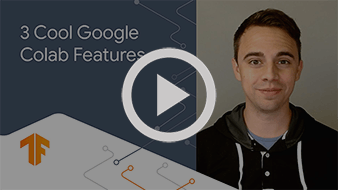
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Apa itu Colab?</h2>
</div>

Colab, atau "Colaboratory", memungkinkan Anda menulis dan mengeksekusi Python di browser, dengan
- Tidak memerlukan konfigurasi
- Akses tanpa biaya ke GPU
- Berbagi dengan mudah

Apakah Anda seorang <strong>pelajar</strong>, <strong>data scientist</strong>, atau <strong>peneliti AI</strong>, Colab dapat memudahkan pekerjaan Anda. Tonton <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Pengantar Colab</a> untuk mempelajari lebih lanjut, atau langsung mulai di bawah ini.

<div class="markdown-google-sans">

## <strong>Memulai</strong>
</div>

Dokumen yang sedang Anda baca bukan halaman statis. Ini media interaktif bernama <strong>notebook Colab</strong> yang memungkinkan Anda menulis dan mengeksekusi kode.

Misalnya, berikut ini <strong>kode sel</strong> dengan skrip Python pendek yang mengomputasi sebuah nilai, menyimpannya dalam suatu variabel, dan mencetak hasilnya:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Untuk mengeksekusi kode dalam sel di atas, pilih kode tersebut dengan mengkliknya, kemudian tekan tombol putar di sebelah kiri kode atau gunakan pintasan keyboard "Command/Ctrl+Enter". Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

Variabel yang Anda tentukan dalam sebuah sel nantinya dapat digunakan di sel lain:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Notebook Colab memungkinkan Anda menggabungkan <strong>kode yang dapat dijalankan</strong> dan <strong>rich text</strong> dalam satu dokumen, beserta <strong>gambar</strong>, <strong>HTML</strong>, <strong>LaTeX</strong>, dan lainnya. Saat Anda membuat notebook Colab Anda sendiri, notebook tersebut akan disimpan di akun Google Drive Anda. Anda dapat dengan mudah membagikan notebook Colab Anda dengan rekan kerja atau teman, sehingga memungkinkan mereka memberikan komentar di notebook Anda atau bahkan mengeditnya. Untuk mempelajari lebih lanjut, buka <a href="/notebooks/basic_features_overview.ipynb">Ringkasan Colab</a>. Untuk membuat notebook Colab baru, Anda dapat menggunakan menu File di atas, atau menggunakan link berikut: <a href="http://colab.research.google.com#create=true">buat notebook Colab baru</a>.

Notebook Colab adalah notebook Jupyter yang dihosting oleh Colab. Untuk mempelajari project Jupyter lebih lanjut, buka <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ilmu data
</div>

Dengan Colab, Anda dapat memanfaatkan kecanggihan library Python yang populer untuk menganalisis dan memvisualisasikan data. Sel kode di bawah menggunakan <strong>numpy</strong> untuk menghasilkan beberapa data acak, dan menggunakan <strong>matplotlib</strong> untuk memvisualisasikannya. Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

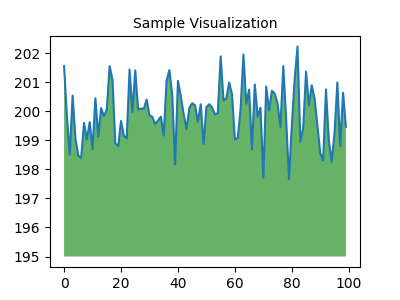

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Anda dapat mengimpor data sendiri ke notebook Colab dari akun Google Drive Anda, termasuk dari spreadsheet, GitHub, dan berbagai sumber lainnya. Untuk mempelajari lebih lanjut pengimporan data dan bagaimana Colab dapat digunakan untuk ilmu data, lihat link di bawah pada bagian <a href="#working-with-data">Bekerja dengan Data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Dengan Colab Anda dapat mengimpor set data gambar, melatih pengklasifikasi gambar pada gambar tersebut, dan mengevaluasi model, semuanya hanya dengan <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">beberapa baris kode</a>. Notebook Colab mengeksekusi kode pada server cloud Google. Itu artinya Anda dapat memanfaatkan kecanggihan hardware Google, termasuk <a href="#using-accelerated-hardware">GPU dan TPU</a>, terlepas dari mesin yang Anda gunakan. Yang Anda butuhkan hanyalah browser.

Colab digunakan secara luas di komunitas machine learning dengan berbagai penerapan meliputi:
- Memulai TensorFlow
- Mengembangkan dan melatih jaringan neural
- Bereksperimen dengan TPU
- Menyebarkan riset AI
- Membuat tutorial

Untuk melihat sampel notebook Colab yang menunjukkan penerapan machine learning, lihat <a href="#machine-learning-examples">contoh machine learning</a> di bawah.